In [1]:
import numpy as np

In [2]:
# Варіант 3
R = np.array(
    [[1,1,0,1,0],
    [1,1,1,1,1],
    [1,0,1,1,0],
    [1,0,1,1,0],
    [0,1,0,0,0]])

In [3]:
# У матриці рефлексивного відношення на головній діагоналі розміщуються одиниці, тобто елемент матриці a(ij) = ,1 якщо i = j .
def reflexive(matrix: np.array):
    
    if matrix.shape[0]!=R.shape[1]:
        return "Oops, the matrix is not square"
    
    is_reflexive = True
    
    for i in range(len(matrix)):
        if matrix[i][i] != 1:
            is_reflexive = False
            break
            
    return is_reflexive

print("Is the relation reflexive?", reflexive(R))


Is the relation reflexive? False


In [4]:
#У матриці антирефлексивного відношення елементи головної діагоналі дорівнюють нулю, тобто a(ij) = 0 якщо i = j .
def antireflexive(matrix: np.array):
    
    if matrix.shape[0]!=R.shape[1]:
        return "Oops, the matrix is not square"
    
    is_antireflexive = True
    
    for i in range(len(matrix)):
        if matrix[i][i] != 0:
            is_antireflexive = False
            break
            
    return is_antireflexive
print("Is the relation antireflexive?", antireflexive(R))

Is the relation antireflexive? False


In [5]:
#a(ji)=a(ij) для всіх значень i, j.
def symmetric(matrix):
    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != matrix[j, i]:
                return False

    return True
print("Is the relation symmetric?", symmetric(R))

Is the relation symmetric? False


In [6]:
#з двох симетричних елементів a(ij) і a(ji) хоча б один обов’язково дорівнює 0.
def assymmetric(matrix):
    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] == 1 and matrix[j, i] == 1:
                return False

    return True
print("Is the relation assymmetric?", assymmetric(R))

Is the relation assymmetric? False


In [7]:
# У матриці антисиметричного відношення a(ji) ∧ a(ij) = 0, коли i ≠ j .
def antisymmetric(matrix):
    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if i!=j and matrix[i, j]==1 and matrix[j, i]==1:
                return False

    return True
print("Is the relation antisymmetric?", antisymmetric(R))

Is the relation antisymmetric? False


In [8]:
# Для цього необхідно обчислити матрицю відношення R**2 (тобто піднести до квадрату матрицю вихідного відношення) і перевірити умову:
# Якщо ij(R**2)≤ ij(R) для всіх значень i, j, то відношення транзитивне.
def transitive(matrix):
    RR = np.dot(matrix,matrix)
    RR[RR>1] = 1
    rows, cols = matrix.shape
    for i in range(rows):
        for j in range(cols):
            if RR[i,j] > R[i,j]:
                return False
    return True
print("Is the relation transitive?", transitive(R)) 

Is the relation transitive? False


In [9]:
# Елемент x* множини Х будемо називати найкращим з огляду на відношення R, якщо x* R x справедливе для всякого елемента x ∈ X .

def best_element(matrix):
    bank =[]
        
    rows, cols = matrix.shape
    for i in range(rows):
        if min(matrix[i]) == 1:
            bank.append('x_' + str(i+1))
    return bank
print("What is/are best element/s:", best_element(R)) 

What is/are best element/s: ['x_2']


In [10]:
# Елемент *x будемо називати найгіршим з огляду на відношення R, якщо x R *x для всіх елементів x∈ X .
def worst_element(matrix):
    matrix = matrix.T
    bank =[]
        
    rows, cols = matrix.shape
    for i in range(rows):
        if min(matrix[i]) == 1:
            bank.append('x_' + str(i+1))
    return bank
print("What is/are worst element/s:", worst_element(R)) 

What is/are worst element/s: []


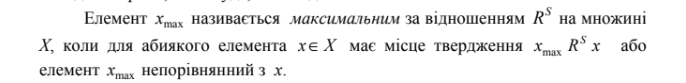

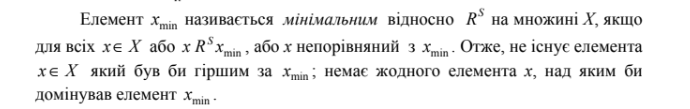

In [11]:
# Строге відношення
def S_matrix(mat):
    matrix = mat.copy()
    for i in range(len(matrix)):
        matrix[i, i] = 0
    rows, cols = matrix.shape
    for i in range(rows):
        for j in range(cols):
            if matrix[i,j] == 1 and matrix[j,i] == 1:
                matrix[i,j] = 0
                matrix[j,i] = 0
                
    return matrix
S_matrix(R)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [12]:
s_m = R-R.T
s_m

array([[ 0,  0, -1,  0,  0],
       [ 0,  0,  1,  1,  0],
       [ 1, -1,  0,  0,  0],
       [ 0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [13]:
def max_el(matrix):
    max_R_x = []
    strong_matrix = S_matrix(matrix)
    strong_matrix = strong_matrix.T
    print(strong_matrix)
    for i in range(len(strong_matrix)):
        if max(strong_matrix[i])==0:
             max_R_x.append('x_' + str(i+1))
    return max_R_x

In [14]:
def min_el(matrix):
    min_R_x = []
    strong_matrix = S_matrix(matrix)
    print(strong_matrix)
    for i in range(len(strong_matrix)):
        if max(strong_matrix[i])==0:
             min_R_x.append('x_' + str(i+1))
    return min_R_x

In [15]:
print("What are max elements:", max_el(R)) 
print("What are min elements:", min_el(R)) 

[[0 0 1 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]
What are max elements: ['x_2', 'x_5']
[[0 0 0 0 0]
 [0 0 1 1 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
What are min elements: ['x_1', 'x_4', 'x_5']


In [16]:
# Відношення R_ називається доповненням відношення
# R , тоді й тільки тоді, коли воно пов’язує тільки ті пари елементів, для яких не
# виконується відношення R .
def complement(matrix):
    complement_R = 1 - R
    return complement_R
complement(R)

array([[0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [1, 0, 1, 1, 1]])

In [17]:
#Оберненим до відношення R називається відношення R^−1 , яке задовольняє таку умову:x R^-1 y ⇔ y R x  . 
# Для матриць відношень R та −1 R буде мати місце така формула: aij(R^-1)= aji(R)  .
def converse(matrix):
    conv_matrix = matrix.T
    return conv_matrix
converse(R)

array([[1, 1, 1, 1, 0],
       [1, 1, 0, 0, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0]])